In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import importlib
import mixing_tools as mtools

# try:
#     importlib.reload(mtools)
#     print("reloading mixing_tools")
# except NameError:
#     import mixing_tools as mtools
#     print("importing mixing_tools")

processing data from  /home/adwait/Workspace/data/float_904750.dat


<IPython.core.display.Javascript object>


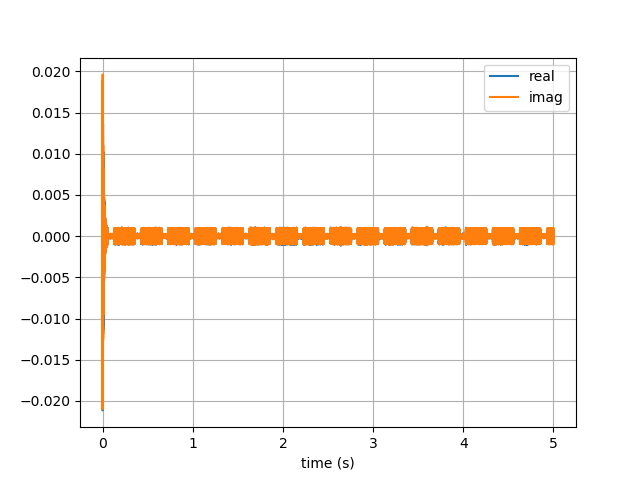

In [3]:
def plotDataFloat(filename):
    data = mtools.load_IQBinary_float32(filename)
    print("processing data from ", filename)
    fs = 1.0e6  # sampling frequency of reception
    fcRX = 904.75e6  # center frequency of RX mixer
    fcTX = 905.0e6  # center frequency of TX
    bwChirp = 125.0e3  # bandwidth of LORA transmission
    sf = 9  # spreading factor of chirp signal
    Ts = 1/fs
    
    n = data.size
    t = np.arange(n)*Ts
    
    plt.figure()
    plt.plot(t, data.real, "C0-", label="real")
    plt.plot(t, data.imag, "C1-", label="imag")
    plt.grid()
    plt.legend()
    plt.xlabel("time (s)")
    
plotDataFloat("/home/adwait/Workspace/data/float_904750.dat")
plt.show()

processing data from  /home/adwait/Workspace/data/short_904750.dat


<IPython.core.display.Javascript object>


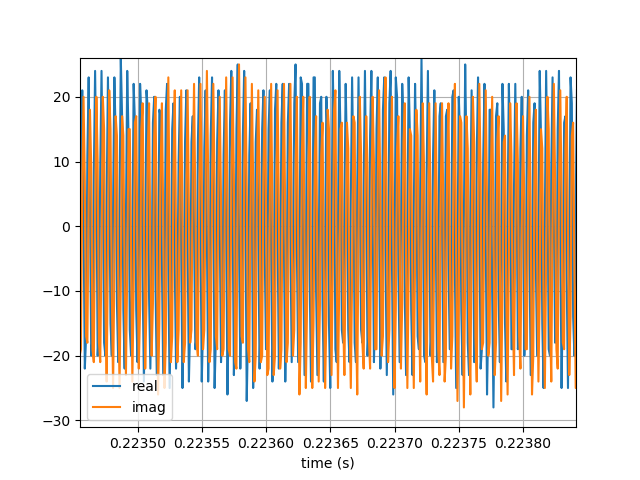

In [7]:
def plotDataShort(filename):
    data = mtools.load_IQBinary_int16(filename)
    print("processing data from ", filename)
    fs = 1.0e6  # sampling frequency of reception
    fcRX = 904.75e6  # center frequency of RX mixer
    fcTX = 905.0e6  # center frequency of TX
    bwChirp = 125.0e3  # bandwidth of LORA transmission
    sf = 9  # spreading factor of chirp signal
    Ts = 1/fs
    
    n = data.size
    t = np.arange(n)*Ts
    
    plt.figure()
    plt.plot(t, data.real, "C0-", label="real")
    plt.plot(t, data.imag, "C1-", label="imag")
    plt.grid()
    plt.legend()
    plt.xlabel("time (s)")
    
plotDataShort("/home/adwait/Workspace/data/short_904750.dat")
plt.show()

In [12]:
def processData(filename):


    # load data and fill out all collection parameters
    data = mtools.load_IQBinary_float32(filename)
    print("processing data from ", filename)
    
    fs = 1.0e6  # sampling frequency of reception
    fcRX = 904.75e6  # center frequency of RX mixer
    fcTX = 905.0e6  # center frequency of TX
    bwChirp = 125.0e3  # bandwidth of LORA transmission
    sf = 9  # spreading factor of chirp signal
    Ts = 1/fs
    
    def loraSymboltime(bw, sf):
        return (2**sf)/bw

    TChirp = loraSymboltime(bwChirp, sf)
    print("chirp time for SF{:d}: {}".format(sf, TChirp))

    # step 1: extract signals only in the relevant frequency bands
    # adjust this so that we're only looking at signals in the relevant bandwidth
    # NOTE: wider bandwidth means more noise but the signal is left intact

    dataBB, fcBB, TsBB = mtools.basebandShift(data, Ts, bwSignal=bwChirp,
                        fcSignal=fcTX, fcData=fcRX, signalType='ds')
    print("size of extracted signal: ", dataBB.size)
    print("frequency of 0th FFT bucket/baseband: ", fcBB)
    print("sampling time at baseband: ", TsBB)

    # generate template
    fcBBChirp = fcTX - fcBB
    print("freq offset of chirp in baseband: ", fcBBChirp)
    template = mtools.chirpTemplate(Ts=TsBB, fc=fcBBChirp, bw=bwChirp, TChirp=TChirp, direction='down')
    print("size of chirp template: ", template.size)

    result = mtools.matchedFilter(dataBB, template)
    
    # plots 2 figures for any time series complex data. One with abs
    def plotComplexTimeSeries(data, Ts, dataName="data", title=None):
        t = np.arange(data.size)*Ts

        plt.figure()
        if title:
            plt.title(title)
        plt.plot(t, np.abs(data), 'C0-', label="abs({})".format(dataName))
        plt.xlabel("time (s)")
        plt.legend()
        plt.grid()

        plt.figure()
        if title:
            plt.title(title)
        plt.plot(t, data.real, 'C0-', label="real({})".format(dataName))
        plt.plot(t, data.imag, 'C1-', label="imag({})".format(dataName))
        plt.xlabel("time (s)")
        plt.legend()
        plt.grid()
        
    # # plot template
    # plotComplexTimeSeries(template, TsBB, dataName="template")
    
    # plot matched filter result
    plotComplexTimeSeries(result, TsBB, dataName="MF output")

processing data from  ../data/test_outside_Feb27/pre_check.dat
chirp time for SF9: 0.004096
size of extracted signal:  250002
frequency of 0th FFT bucket/baseband:  904937500.0
sampling time at baseband:  3.999968000255998e-06
freq offset of chirp in baseband:  62500.0
size of chirp template:  1025


<IPython.core.display.Javascript object>


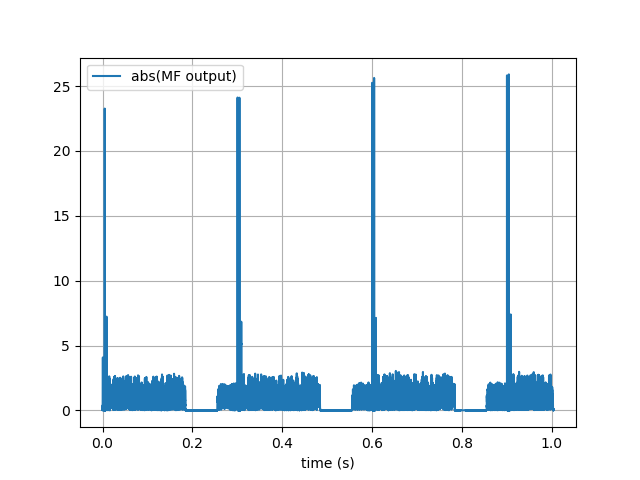

<IPython.core.display.Javascript object>


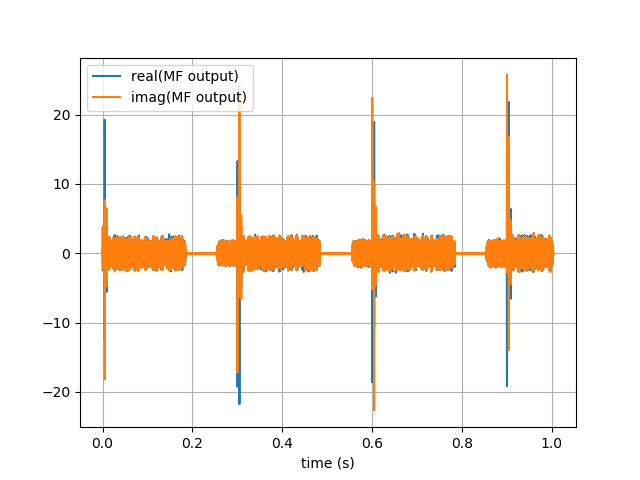

In [13]:
processData("../data/test_outside_Feb27/pre_check.dat")
plt.show()

processing data from  ../data/test_outside_Feb27/test_outside_bridgecross.dat
chirp time for SF9: 0.004096
size of extracted signal:  2500002
frequency of 0th FFT bucket/baseband:  904937500.0
sampling time at baseband:  3.99999680000256e-06
freq offset of chirp in baseband:  62500.0
size of chirp template:  1025


<IPython.core.display.Javascript object>


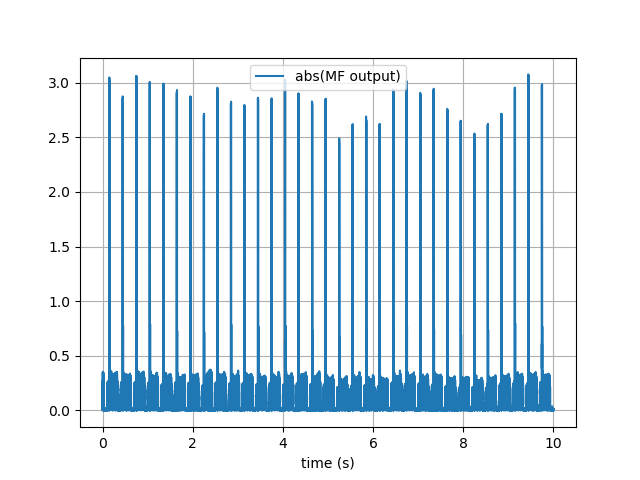

<IPython.core.display.Javascript object>


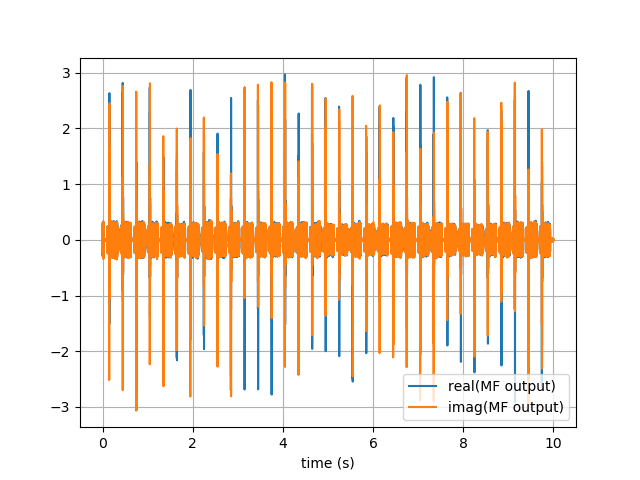

In [14]:
processData("../data/test_outside_Feb27/test_outside_bridgecross.dat")
plt.show()

processing data from  ../data/test_outside_Feb27/test_outside_scottfront.dat
chirp time for SF9: 0.004096
size of extracted signal:  2500002
frequency of 0th FFT bucket/baseband:  904937500.0
sampling time at baseband:  3.99999680000256e-06
freq offset of chirp in baseband:  62500.0
size of chirp template:  1025


<IPython.core.display.Javascript object>


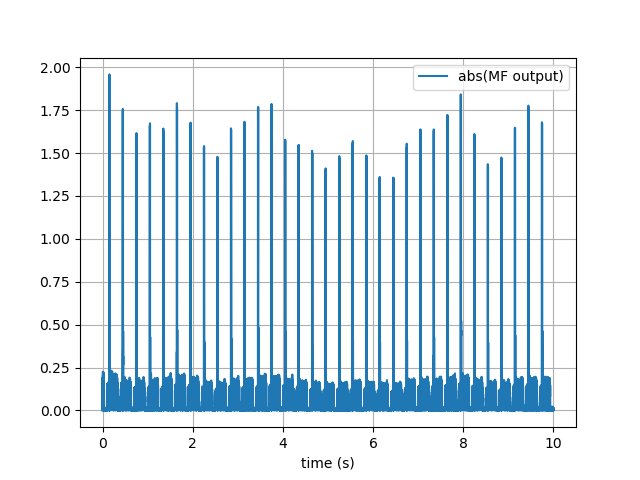

<IPython.core.display.Javascript object>


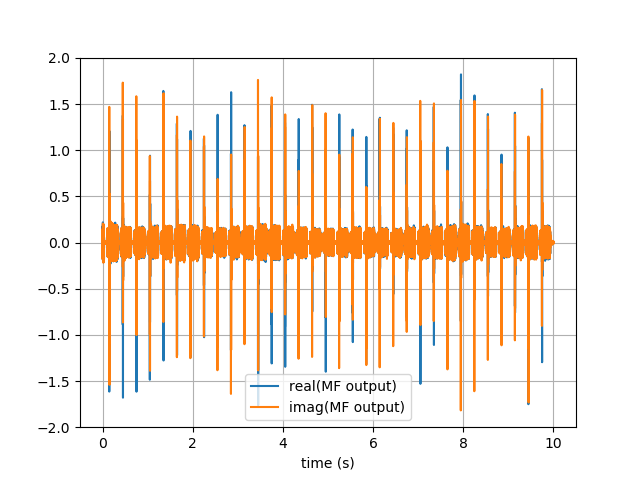

In [15]:
processData("../data/test_outside_Feb27/test_outside_scottfront.dat")
plt.show()

processing data from  ../data/test_outside_Feb27/test_outside_underscott.dat
chirp time for SF9: 0.004096
size of extracted signal:  2500002
frequency of 0th FFT bucket/baseband:  904937500.0
sampling time at baseband:  3.99999680000256e-06
freq offset of chirp in baseband:  62500.0
size of chirp template:  1025


<IPython.core.display.Javascript object>


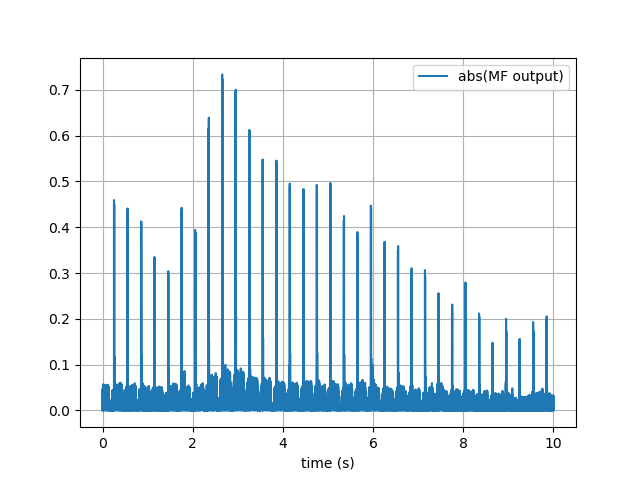

<IPython.core.display.Javascript object>


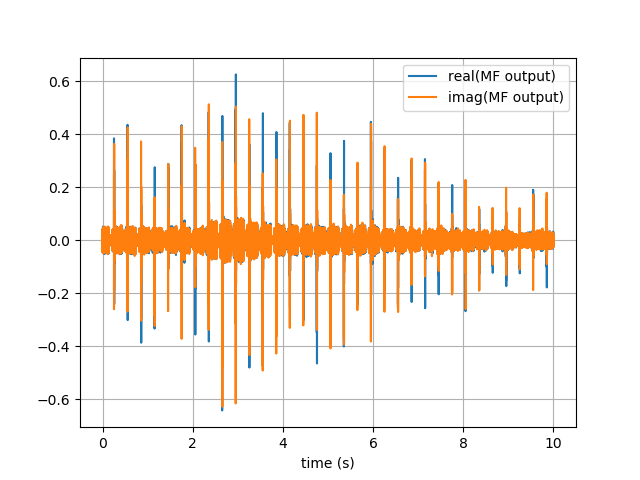

In [16]:
processData("../data/test_outside_Feb27/test_outside_underscott.dat")
plt.show()

processing data from  ../data/test_outside_Feb27/test_outside_cicg4.dat
chirp time for SF9: 0.004096
size of extracted signal:  2500002
frequency of 0th FFT bucket/baseband:  904937500.0
sampling time at baseband:  3.99999680000256e-06
freq offset of chirp in baseband:  62500.0
size of chirp template:  1025


<IPython.core.display.Javascript object>


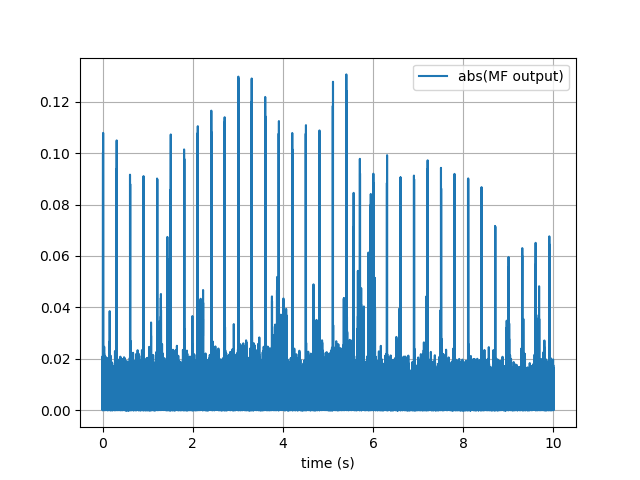

<IPython.core.display.Javascript object>


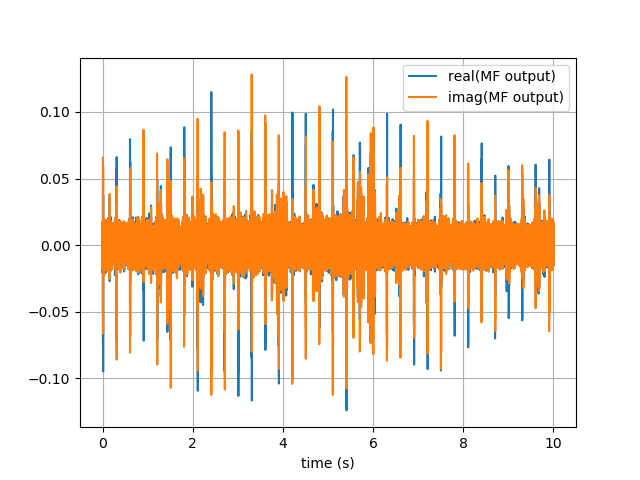

In [17]:
processData("../data/test_outside_Feb27/test_outside_cicg4.dat")
plt.show()